
<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">Twitter Sentiment Analysis</h1>
<h3 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hasnain Yaqoob</h3>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hasnainyaqub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainyaqooob)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hasnain-yaqoob-/)  


[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/Hasnain_Yaqoob_)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hasnainyaqkoob)
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@hasnainyaqub)  

[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/hasnain_yaqub/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hasnainyaqubakm@gmail.com)

# Import Libraries

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Load dataset

In [40]:
# load dataset from data folder
dft = pd.read_csv('data/twitter_training.csv', header=None)
dfv = pd.read_csv('data/twitter_validation.csv', header=None)
dft.head() 

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [41]:
df = dft.rename(columns={
    0: 'Tweet ID',
    1: 'Entity',
    2: 'Sentiment',
    3: 'Tweet content'
})
df.head()

,Tweet ID,Entity,Sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [42]:
dfv = dfv.rename(columns={
    0: 'Tweet ID',
    1: 'Entity',
    2: 'Sentiment',
    3: 'Tweet content'
})
dfv.head()

,Tweet ID,Entity,Sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [44]:
# lets check for null values
print((df.isnull().sum()) / len(df) * 100)
df.dropna(inplace=True)
df.info()

Tweet ID         0.000000
Entity           0.000000
Sentiment        0.000000
Tweet content    0.918561
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       73996 non-null  int64 
 1   Entity         73996 non-null  object
 2   Sentiment      73996 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


Text(0.5, 1.0, 'Sentiment distribution')

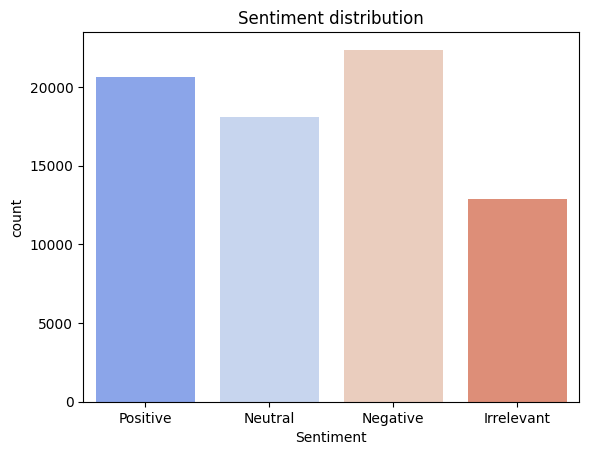

In [45]:
print(df['Sentiment'].value_counts())
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment distribution')

Entity
LeagueOfLegends         2377
MaddenNFL               2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64


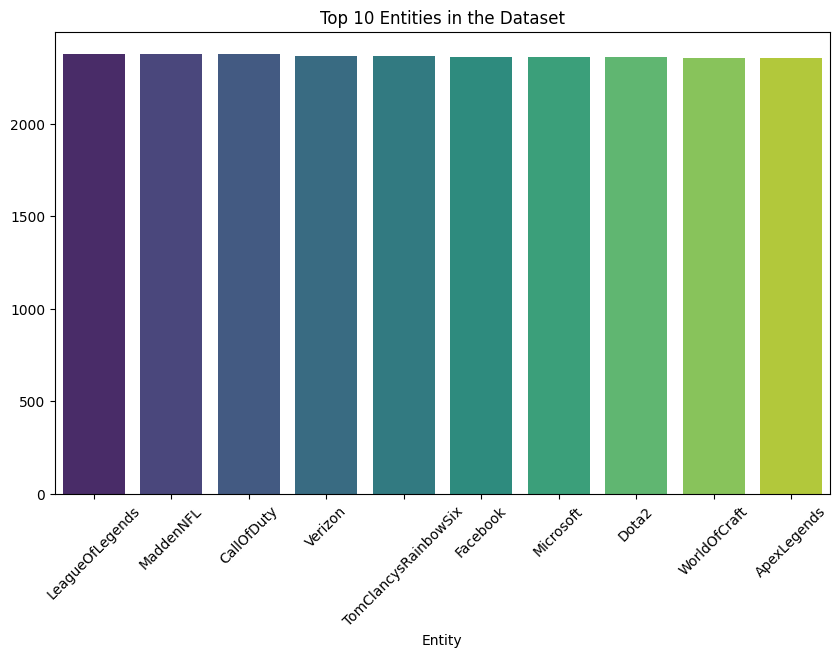

In [46]:
# top 10 entities in the dataset
print(df['Entity'].value_counts().head(10))
top_entities = df['Entity'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_entities.index, y=top_entities.values, palette='viridis')
plt.title('Top 10 Entities in the Dataset')
plt.xticks(rotation=45)
plt.show()

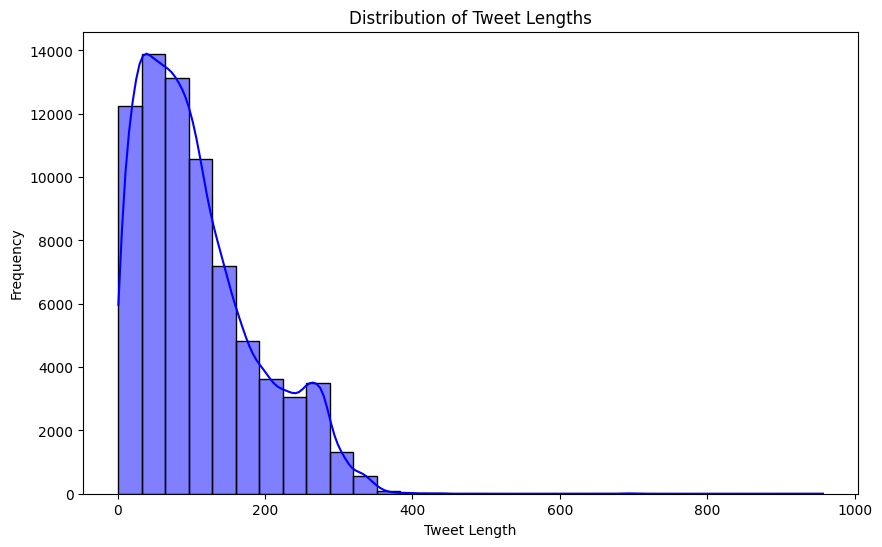

In [47]:
# length of tweets distribution
df['Tweet Length'] = df['Tweet content'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df['Tweet Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

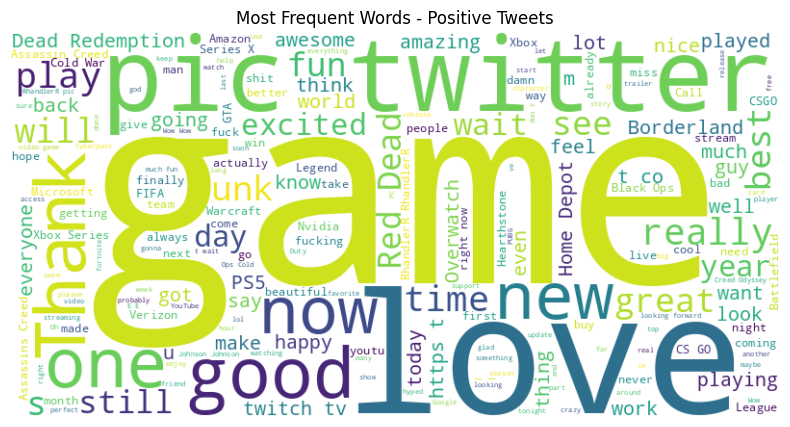

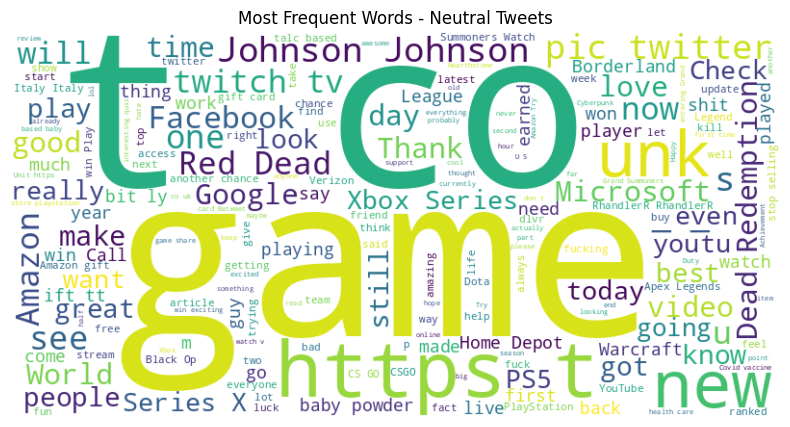

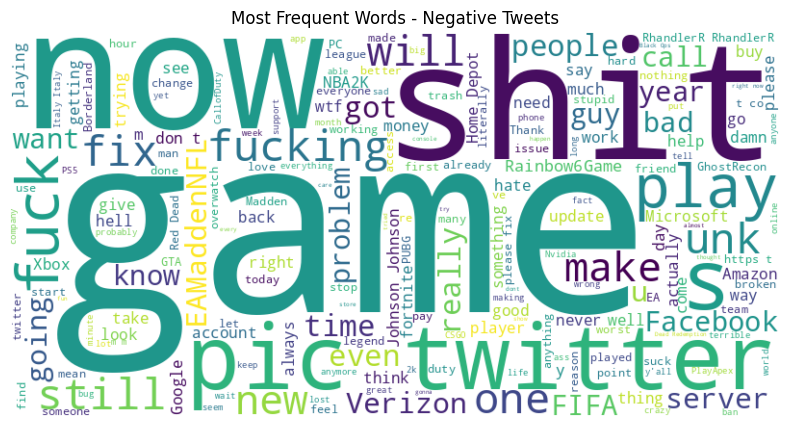

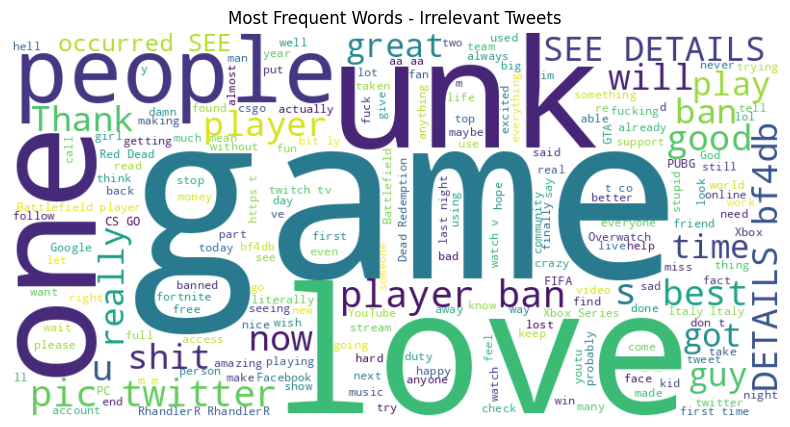

In [48]:
from wordcloud import WordCloud
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment']==sentiment]['Tweet content'].astype(str))
    # print(sentiment)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words - {sentiment.capitalize()} Tweets')
    plt.show()

# Preprocess the data

In [78]:
import re
import spacy
import swifter

nlp = spacy.load("en_core_web_sm")

# normalize fancy apostrophes and similar characters to straight apostrophe
_APOSTROPHE_NORMALIZE = str.maketrans({
    "\u2018": "'", "\u2019": "'", "\u201c": '"', "\u201d": '"', "\u2014": "-", "\u2013": "-"
})

# cleaned contractions mapping (lowercase keys)
_contractions = {
    "i'm": "i am", "im": "i am", "i’ve": "i have", "ive": "i have",
    "you're": "you are", "youre": "you are",
    "he's": "he is", "hes": "he is",
    "she's": "she is", "shes": "she is",
    "it's": "it is", "its": "it is",
    "we're": "we are", "were": "we are",
    "they're": "they are", "theyre": "they are",
    "that's": "that is", "thats": "that is",
    "there's": "there is", "theres": "there is",
    "don't": "do not", "dont": "do not",
    "can't": "can not", "cant": "can not",
    "won't": "will not", "wont": "will not",
    "didn't": "did not", "didnt": "did not",
    "i'll": "i will", "ill": "i will",
    "we'll": "we will", "well": "we will",
    "you'll": "you will", "youll": "you will",
    "isn't": "is not", "isnt": "is not",
    "couldn't": "could not", "couldnt": "could not",
    "wouldn't": "would not", "wouldnt": "would not",
    "shouldn't": "should not", "shouldnt": "should not",
    "she'd": "she would", "shed": "she would",
    "he'd": "he would", "hed": "he would",
    "they'd": "they would", "theyd": "they would",
    "we'd": "we would", "wed": "we would",
    "y'all": "you all", "yall": "you all",
    "ain't": "is not", "aint": "is not",
    "gonna": "going to", "gotta": "got to",
    "wanna": "want to"
}

# compile contraction regex: longest-first to avoid partial matches
_contr_pattern = re.compile(
    r'\b(' + '|'.join(re.escape(k) for k in sorted(_contractions.keys(), key=len, reverse=True)) + r')\b',
    flags=re.IGNORECASE
)

# other precompiled regexes
url_pattern = re.compile(r'http\S+|www\S+|https\S+')
mention_pattern = re.compile(r'@\w+')
hashtag_pattern = re.compile(r'#')
newline_pattern = re.compile(r'[\n\r]')

def _expand_contractions(text):
    # replacement function preserves the mapped value (lowercase)
    def repl(match):
        key = match.group(0).lower()
        return _contractions.get(key, key)
    return _contr_pattern.sub(repl, text)

def preprocess(text):
    text = str(text)
    # normalize fancy apostrophes and similar punctuation first
    text = text.translate(_APOSTROPHE_NORMALIZE)
    text = text.lower()
    text = url_pattern.sub('', text)
    text = mention_pattern.sub('', text)
    text = hashtag_pattern.sub('', text)    # remove '#' symbol, keep tag word
    text = newline_pattern.sub(' ', text)
    # expand contractions before tokenization
    text = _expand_contractions(text)

    # process with spaCy
    doc = nlp(text)

    tokens = []
    for token in doc:
        lemma = token.lemma_.strip()
        if token.lower_ == 'not':          # keep explicit negation
            tokens.append('not')
            continue
        if token.is_alpha and (not token.is_stop) and len(lemma) > 1:
            tokens.append(lemma)

    return " ".join(tokens)

# quick local test:
# print(preprocess("im getting on borderlands and i will murder you all"))
# expected snippet: "get borderland murder" (no stray 'm')


In [79]:
import swifter
df['clean_text'] = df['Tweet content'].swifter.apply(preprocess)

Pandas Apply:   0%|          | 0/73996 [00:00<?, ?it/s]

In [80]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet content,Tweet Length,clean_text,first_five_Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,get borderland murder,im getting on borderlands and
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,come border kill,I am coming to the
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,get borderland kill,im getting on borderlands and
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,come borderland murder,im coming on borderlands and
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,get borderland murder,im getting on borderlands 2


In [81]:
df.to_csv('data/clean_df.csv')